In [2]:
from database_utils import DatabaseConnector, build_dataframe

db_connector = DatabaseConnector('localhost', 'root', '12345', 'CORPUS_VIES')
retrieved_data = build_dataframe(db_connector.getDataTextAndLabel())

SELECT PARAGRAPH, POLARITY FROM PARAGRAPHS WHERE POLARITY IS NOT NULL AND trim(POLARITY) <> ""
1042  Paragraphs encountered


# Balanceamento dos dados

<IPython.core.display.Javascript object>


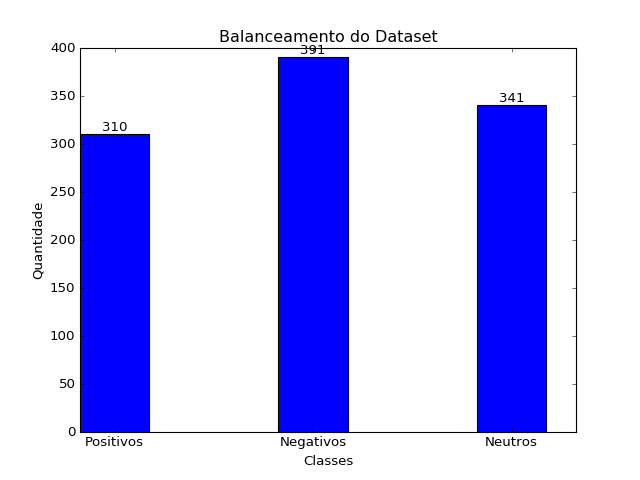

In [2]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.0*height, '%d'%int(height),
                ha='center', va='bottom')

positive_data = retrieved_data.loc[retrieved_data['labels'] == 'PO']
negative_data = retrieved_data.loc[retrieved_data['labels'] == 'NG']
neutral_data = retrieved_data.loc[retrieved_data['labels'] == 'NE']

values = [positive_data.shape[0], negative_data.shape[0], neutral_data.shape[0]]

xlabels = ["Positivos", "Negativos", "Neutros"]
indexes = np.arange(len(xlabels))
barWidth = 0.35

f1 = plt.figure()
ax1 = f1.add_subplot(111)

p = ax1.bar(indexes, values, barWidth, tick_label = values)
plt.ylabel('Quantidade')
plt.xlabel('Classes')
plt.title('Balanceamento do Dataset')
plt.xticks(indexes + barWidth/2., xlabels)

autolabel(p)

plt.show()

In [2]:
from database_utils import DatabaseConnector, build_dataframe
from machine_learning_utils import MLWrapper
from sklearn.naive_bayes import MultinomialNB

print("Treinando o modelo")
ml_wrapper = MLWrapper(MultinomialNB())
ml_wrapper.train(retrieved_data)

Treinando o modelo


/home/caiomagno/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/caiomagno/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring

Total news classified: 1042
Score: 0.517308014758
Accuracy: 0.530778685802
Confusion matrix:
[[122 138  50]
 [ 32 303  56]
 [ 45 168 128]]


/home/caiomagno/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


Tentando outro classificador

In [3]:
from sklearn import svm
from machine_learning_utils import MLWrapper

print("Treinando o modelo")
ml_wrapper = MLWrapper(svm.SVC(C = 316))
ml_wrapper.train(retrieved_data)

Treinando o modelo


/home/caiomagno/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/caiomagno/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring

Total news classified: 1042
Score: 0.513725005209
Accuracy: 0.514406573207
Confusion matrix:
[[139  63 108]
 [ 75 191 125]
 [ 54  81 206]]


/home/caiomagno/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


# Stemming

Utilizar o stemming para o portugues

In [25]:
import nltk

# Exemplo
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("COPIAR")

'copi'

Rodando os mesmo algoritmos com o Stemmer

In [ ]:
from database_utils import DatabaseConnector, build_dataframe
from machine_learning_utils import MLWrapper
from sklearn.naive_bayes import MultinomialNB

print("Treinando o modelo")
ml_wrapper = MLWrapper(MultinomialNB())
ml_wrapper.train(retrieved_data)

In [18]:
from pickle import load
f = open('bigram_tagger.pkl', 'rb')
tagger = load(f)
f.close()

tagger.tag(['Aécio'])

[('Aécio', 'NPROP')]

# Análise de Frequencia dos Adjetivos


In [22]:
import pymysql
from nltk import FreqDist

def get_adjective_by_sentiment(sentiment):
    db = pymysql.connect('localhost', 'root', '12345', 'CORPUS_VIES')
    cursor = db.cursor()

    sql_statement = 'SELECT PARAGRAPH FROM PARAGRAPHS WHERE POLARITY = "%s"' %sentiment
    print(sql_statement)

    cursor.execute(sql_statement)
    print(cursor.rowcount, ' Paragraphs encountered')
    lista = cursor.fetchall()
    db.close()

    result_list = []
    for sentence in lista:
        result = tagger.tag(sentence[0].split())
        result_list += result

    fd = FreqDist([word for (word,tag) in result_list if tag[:3] == 'ADJ'])
    adj_set = set(fd.keys())
    print(len(adj_set), ' Adjectives encountered\n')
    
    return adj_set

pos_adj = get_adjective_by_sentiment("PO")
neg_adj = get_adjective_by_sentiment("NG")
neu_adj = get_adjective_by_sentiment("NE")

SELECT PARAGRAPH FROM PARAGRAPHS WHERE POLARITY = "PO"
310  Paragraphs encountered
326  Adjectives encountered

SELECT PARAGRAPH FROM PARAGRAPHS WHERE POLARITY = "NG"
391  Paragraphs encountered
347  Adjectives encountered

SELECT PARAGRAPH FROM PARAGRAPHS WHERE POLARITY = "NE"
341  Paragraphs encountered
269  Adjectives encountered



In [23]:
pos_excl = pos_adj.difference(neg_adj.union(neu_adj))
neg_excl = neg_adj.difference(pos_adj.union(neu_adj))
neu_excl = neu_adj.difference(neg_adj.union(pos_adj))

print('Quantidade de adjetivos exclusivos')
print('Positivos: ', len(pos_excl))
print('Negativos: ', len(neg_excl))
print('Neutros: ', len(neu_excl))

Quantidade de adjetivos exclusivos
Positivos:  135
Negativos:  158
Neutros:  96


In [53]:
from pickle import load
from pandas import DataFrame

# retrieved_data[retrieved_data['labels'] == 'NE']

# for l in retrieved_data.values:
#     print(l)

def adj_incidence(textdata_df):
    f = open('bigram_tagger.pkl', 'rb')
    tagger = load(f)
    f.close()
    
    adj_class_counter = {'pos':0, 'neg':0, 'neu':0}
    for value in textdata_df.values:
        tokens = value[1].split()
        tags = tagger.tag(tokens)
        adjs = [token for token, tag in tags if tag == "ADJ" ]
        for adj in adjs:
            if adj in neg_excl: adj_class_counter['neg']+=1
            if adj in pos_excl: adj_class_counter['pos']+=1
            if adj in neu_excl: adj_class_counter['neu']+=1
    return adj_class_counter
        
pos_data = retrieved_data[retrieved_data['labels'] == 'PO']
neg_data = retrieved_data[retrieved_data['labels'] == 'NG']
neu_data = retrieved_data[retrieved_data['labels'] == 'NE']

count_pos = adj_incidence(pos_data)
count_neg = adj_incidence(neg_data)
count_neu = adj_incidence(neu_data)

In [54]:
count_pos, count_neg, count_neu

({'neg': 0, 'neu': 0, 'pos': 170},
 {'neg': 196, 'neu': 0, 'pos': 0},
 {'neg': 0, 'neu': 122, 'pos': 0})

In [46]:
print(adj_incidence(pos_data.iloc[1]))
print(pos_data.iloc[1].values)

{'neu': 0, 'neg': 0, 'pos': 0}
['PO'
 'Marina ainda comentou na TV o resultado do Ideb  Índice de Desenvolvimento da Educação Básica   em que a educação  deu um salto  em Pernambuco  Estado governador por Campos   O resultado vem do investimento em educação integral   disse ']


In [55]:
print(pos_excl)

{'livre', 'inconstitucional', 'fiel', 'raro', 'branca', 'gerenciais', 'governamentais', 'baiana', 'transparente', 'religiosa', 'humanista', 'hipotético', 'essenciais', 'jurídicos', 'altíssima', 'anuais', 'verdadeiros', 'mútuos', 'sozinhos', 'estreita', 'diferentes', 'renovável', 'favorável', 'democráticas', 'analfabeta', 'suficiente', 'negra', 'laico', 'educacionais', 'modesta', 'florestal', 'correto', 'coletivos', 'persistente', 'perigoso', 'humorada', 'renováveis', 'imutável', 'histórico', 'fatal', 'viável', 'supremo', 'relativa', 'ativo', 'vivos', 'firme', 'europeus', 'humanos', 'oeste', 'flutuante', 'mundial', 'indevido', 'conservadora', 'republicano', 'caro', 'otimista', 'ético', 'básicos', 'igual', 'ambientalista', 'rápida', 'profissional', 'ótimo', 'digitais', 'eficaz', 'carente', 'administrativos', 'prontas', 'rigorosa', 'antigos', 'competentes', 'clandestinos', 'anteriores', 'presentes', 'únicos', 'civil', 'rural', 'nacionais', 'financeira', 'curto', 'prioritário', 'vitoriosa'

NameError: name 'np' is not defined